# Initial exploration of the CRISPR dependency data

In [2]:
import pathlib
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as gg
import seaborn as sns
from plotnine import *

warnings.filterwarnings("ignore")

In [3]:
# Set constants
adult_threshold = 18
liquid_tumors = ["Leukemia", "Lymphoma"]

In [4]:
# Set i/o paths and files
data_dir = pathlib.Path("../0.data-download/data")
fig_dir = pathlib.Path("figures")
fig_dir.mkdir(exist_ok=True)

# Input files
model_input_file = pathlib.Path(f"{data_dir}/Model.csv")
crispr_input_file = pathlib.Path(f"{data_dir}/CRISPRGeneEffect.csv")
gene_input_file = pathlib.Path(f"{data_dir}/depmap_gene_meta.tsv")

# Output figures
cancer_type_output_figure = pathlib.Path(f"{fig_dir}/sample_cancer_types_bar_chart.png")
age_category_output_figure = pathlib.Path(f"{fig_dir}/age_categories_bar_chart.png")
age_distribution_output_figure = pathlib.Path(
    f"{fig_dir}/sample_age_distribution_plot.png"
)
sex_output_figure = pathlib.Path(f"{fig_dir}/sample_gender_bar_chart.png")
pediatric_cancer_type_output_figure = pathlib.Path(
    f"{fig_dir}/pediatric_sample_cancer_types_bar_chart.png"
)
adult_cancer_type_output_figure = pathlib.Path(
    f"{fig_dir}/adult_sample_cancer_types_bar_chart.png"
)

In [6]:
# Load model data
model_df = pd.read_csv(model_input_file)

print(model_df.shape)
model_df.head(3)

(1864, 30)


,ModelID,PatientID,CellLineName,StrippedCellLineName,Age,SourceType,SangerModelID,RRID,DepmapModelType,AgeCategory,...,PublicComments,WTSIMasterCellID,EngineeredModel,TreatmentStatus,OnboardedMedia,PlateCoating,OncotreeCode,OncotreeSubtype,OncotreePrimaryDisease,OncotreeLineage
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,60.0,Commercial,SIDM00105,CVCL_0465,HGSOC,Adult,...,NaN,2201.0,NaN,NaN,MF-001-041,NaN,HGSOC,High-Grade Serous Ovarian Cancer,Ovarian Epithelial Tumor,Ovary/Fallopian Tube
1,ACH-000002,PT-5qa3uk,HL-60,HL60,36.0,Commercial,SIDM00829,CVCL_0002,AML,Adult,...,NaN,55.0,NaN,NaN,MF-005-001,NaN,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid
2,ACH-000003,PT-puKIyc,CACO2,CACO2,72.0,Commercial,SIDM00891,CVCL_0025,COAD,Adult,...,NaN,NaN,NaN,Unknown,MF-015-009,NaN,COAD,Colon Adenocarcinoma,Colorectal Adenocarcinoma,Bowel


In [5]:
# Load gene effect data
gene_dependency_df = pd.read_csv(crispr_input_file)

print(gene_dependency_df.shape)
gene_dependency_df.head(3)

(1095, 17932)


,ModelID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,ACH-000001,-0.102725,0.058595,0.058246,-0.041881,-0.088661,0.170335,-0.015254,-0.223691,0.218612,...,-0.084055,-0.084184,0.131495,0.238702,0.201712,-0.250381,0.045612,0.044154,0.146801,-0.473583
1,ACH-000004,0.008878,-0.077633,-0.099297,0.030120,-0.080334,-0.112404,0.298774,-0.125139,0.218675,...,-0.066673,-0.443145,0.183618,0.058936,0.108711,0.056322,-0.355712,0.135310,0.200408,-0.076150
2,ACH-000005,-0.117950,0.013989,0.164099,0.184570,-0.201766,-0.202198,0.207814,-0.089192,-0.082624,...,-0.151588,-0.402572,-0.073320,-0.114402,-0.009449,-0.198378,-0.135007,0.014708,-0.065341,-0.196296


In [7]:
# Load gene data for subsetting
gene_meta_df = pd.read_csv(gene_input_file, sep="\t")

print(gene_meta_df.shape)
gene_meta_df.head(3)

(2921, 19)


,Name,symbol,entrezgene,Function_1,Function_2,Function_3,Function_4,Loading_1,Loading_2,Loading_3,Loading_4,Recon_Pearson,Location,Location_URL,DepMap_URL,GeneCard_URL,NIH_Gene_URL,Pubmed_Count,Understudied
0,AAAS (8086),AAAS,8086,V105,V112,V148,V87,0.486503,0.319132,0.250985,-0.085859,0.564515,"mitochondrial outer membrane, peroxisome",https://humancellmap.org/explore/reports/prey?...,https://depmap.org/portal/gene/AAAS?tab=overview,https://www.genecards.org/cgi-bin/carddisp.pl?...,https://www.ncbi.nlm.nih.gov/gene/?term=8086,93.0,False
1,AAMP (14),AAMP,14,V16,V37,V78,V24,0.214734,0.196146,-0.176450,0.163906,0.386308,NaN,NaN,https://depmap.org/portal/gene/AAMP?tab=overview,https://www.genecards.org/cgi-bin/carddisp.pl?...,https://www.ncbi.nlm.nih.gov/gene/?term=14,49.0,False
2,AARS (16),AARS,16,V10,V63,V1,V98,0.417229,0.251385,0.142732,0.075179,0.561534,NaN,NaN,https://depmap.org/portal/gene/AARS?tab=overview,https://www.genecards.org/cgi-bin/carddisp.pl?...,https://www.ncbi.nlm.nih.gov/gene/?term=16,80.0,False


## Describe input data

In [24]:
# Model.csv visualization
# How many samples from Model.csv?
n_samples_model = len(model_df["ModelID"].unique())
print(f"Number of samples documented in Model.csv: {n_samples_model} \n")

# How many samples from CRISPRGeneDependency.csv?
n_samples_gene = len(gene_dependency_df["ModelID"].unique())
print(f"Number of samples measured in CRISPRGeneDependency.csv: {n_samples_gene} \n")

# Identify which samples are included in both Model.csv and CRISPRGeneDependency.csv
sample_overlap = list(set(model_df["ModelID"]) & set(gene_dependency_df["ModelID"]))

# count the number of samples that overlap in both data sets
print(f"Samples measured in both: {len(sample_overlap)} \n")

# count the number of genes we will use to subset
print(f"Number of genes that pass QC: {gene_meta_df.symbol.nunique()} \n")

# How many different types of cancer?
n_cancer_types = model_df.query("ModelID in @sample_overlap")[
    "OncotreePrimaryDisease"
].nunique()
print(f"Number of Cancer Types: \n {n_cancer_types} \n")

model_df.head()

Number of samples documented in Model.csv: 1864 

Number of samples measured in CRISPRGeneDependency.csv: 1095 

Samples measured in both: 1095 

Number of genes that pass QC: 2921 

Number of Cancer Types: 
 70 



,ModelID,PatientID,CellLineName,StrippedCellLineName,Age,SourceType,SangerModelID,RRID,DepmapModelType,AgeCategory,...,PublicComments,WTSIMasterCellID,EngineeredModel,TreatmentStatus,OnboardedMedia,PlateCoating,OncotreeCode,OncotreeSubtype,OncotreePrimaryDisease,OncotreeLineage
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,60.0,Commercial,SIDM00105,CVCL_0465,HGSOC,Adult,...,NaN,2201.0,NaN,NaN,MF-001-041,NaN,HGSOC,High-Grade Serous Ovarian Cancer,Ovarian Epithelial Tumor,Ovary/Fallopian Tube
1,ACH-000002,PT-5qa3uk,HL-60,HL60,36.0,Commercial,SIDM00829,CVCL_0002,AML,Adult,...,NaN,55.0,NaN,NaN,MF-005-001,NaN,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid
2,ACH-000003,PT-puKIyc,CACO2,CACO2,72.0,Commercial,SIDM00891,CVCL_0025,COAD,Adult,...,NaN,NaN,NaN,Unknown,MF-015-009,NaN,COAD,Colon Adenocarcinoma,Colorectal Adenocarcinoma,Bowel
3,ACH-000004,PT-q4K2cp,HEL,HEL,30.0,Commercial,SIDM00594,CVCL_0001,AML,Adult,...,NaN,783.0,NaN,Post-treatment,MF-001-001,NaN,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid
4,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,30.0,Commercial,SIDM00593,CVCL_2481,AML,Adult,...,NaN,NaN,NaN,NaN,MF-001-001,NaN,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid


figures/sample_cancer_types_bar_chart.png


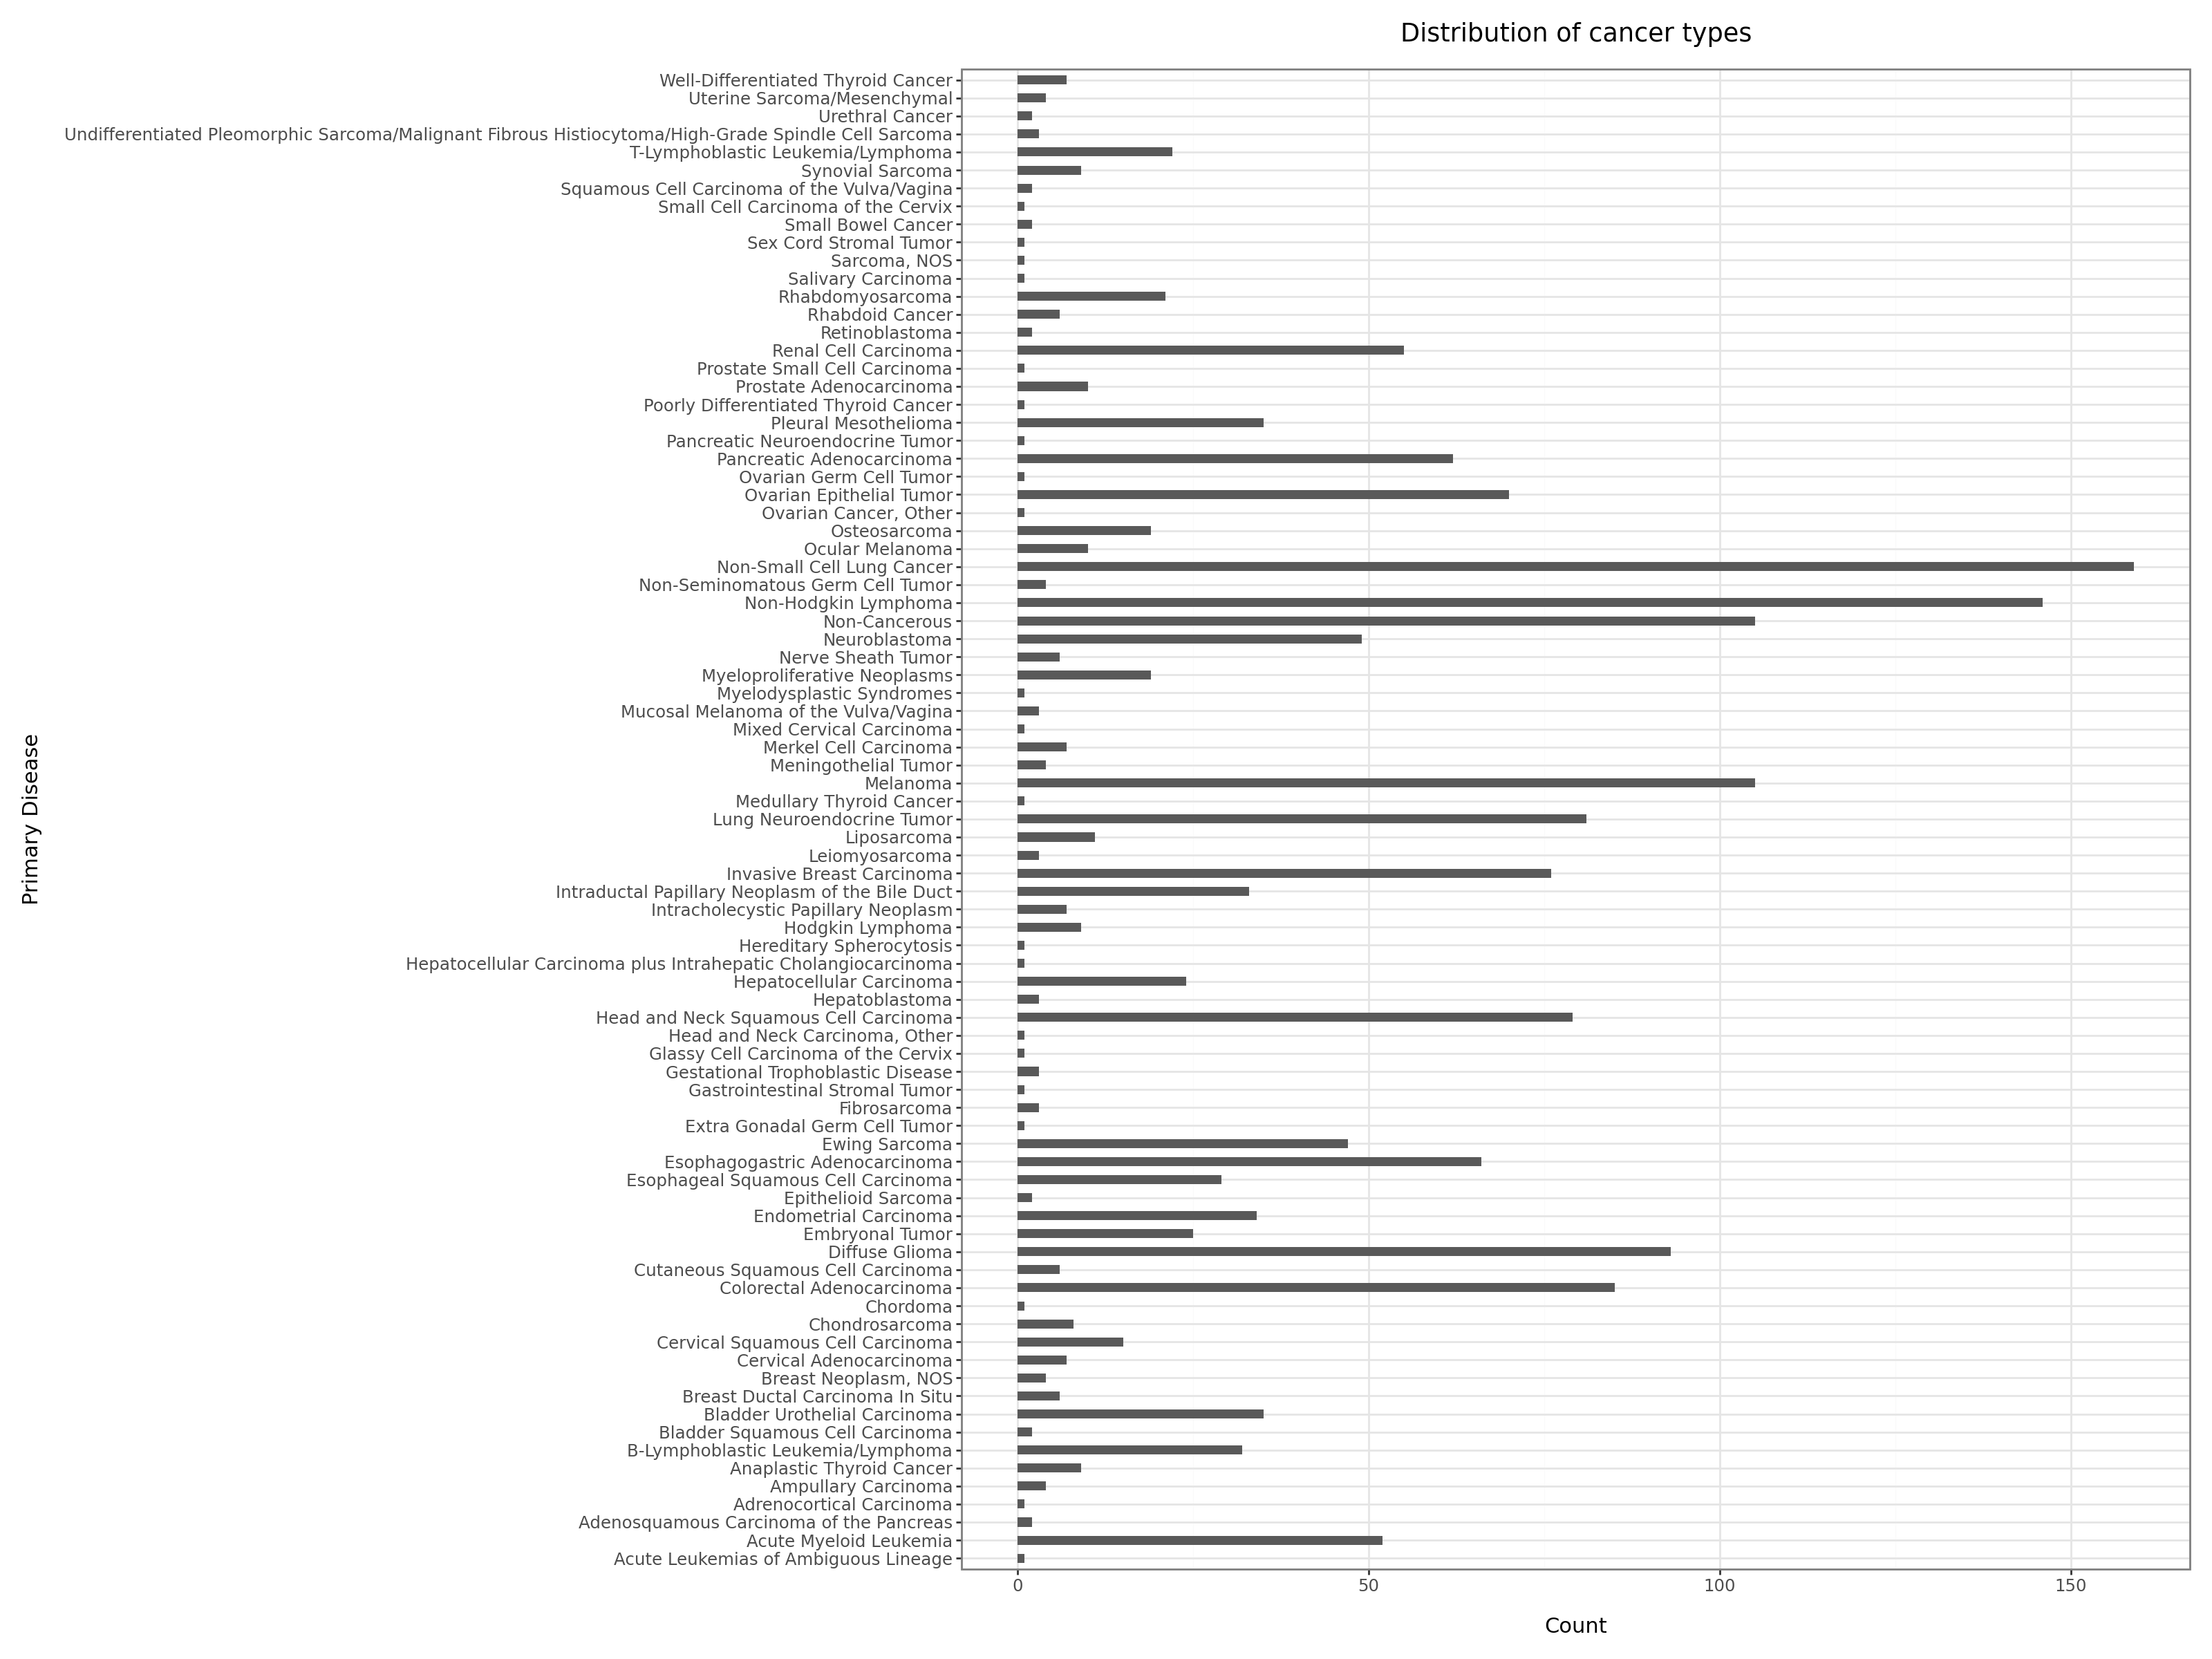

In [27]:
# Visualize cancer type distribution
cancer_types_bar = (
    gg.ggplot(model_df, gg.aes(x="OncotreePrimaryDisease"))
    + gg.geom_bar(width = 0.5, position = position_dodge2(padding = 0.5))
    + gg.coord_flip()
    + gg.ggtitle("Distribution of cancer types")
    + gg.xlab("Primary Disease")
    + gg.ylab("Count")
    + gg.theme_bw()
    + theme(figure_size = (16, 12))

)

cancer_types_bar.save(cancer_type_output_figure, dpi=500, height=11, width=12)
print(cancer_type_output_figure)

cancer_types_bar

## Visualize age categories and distribution

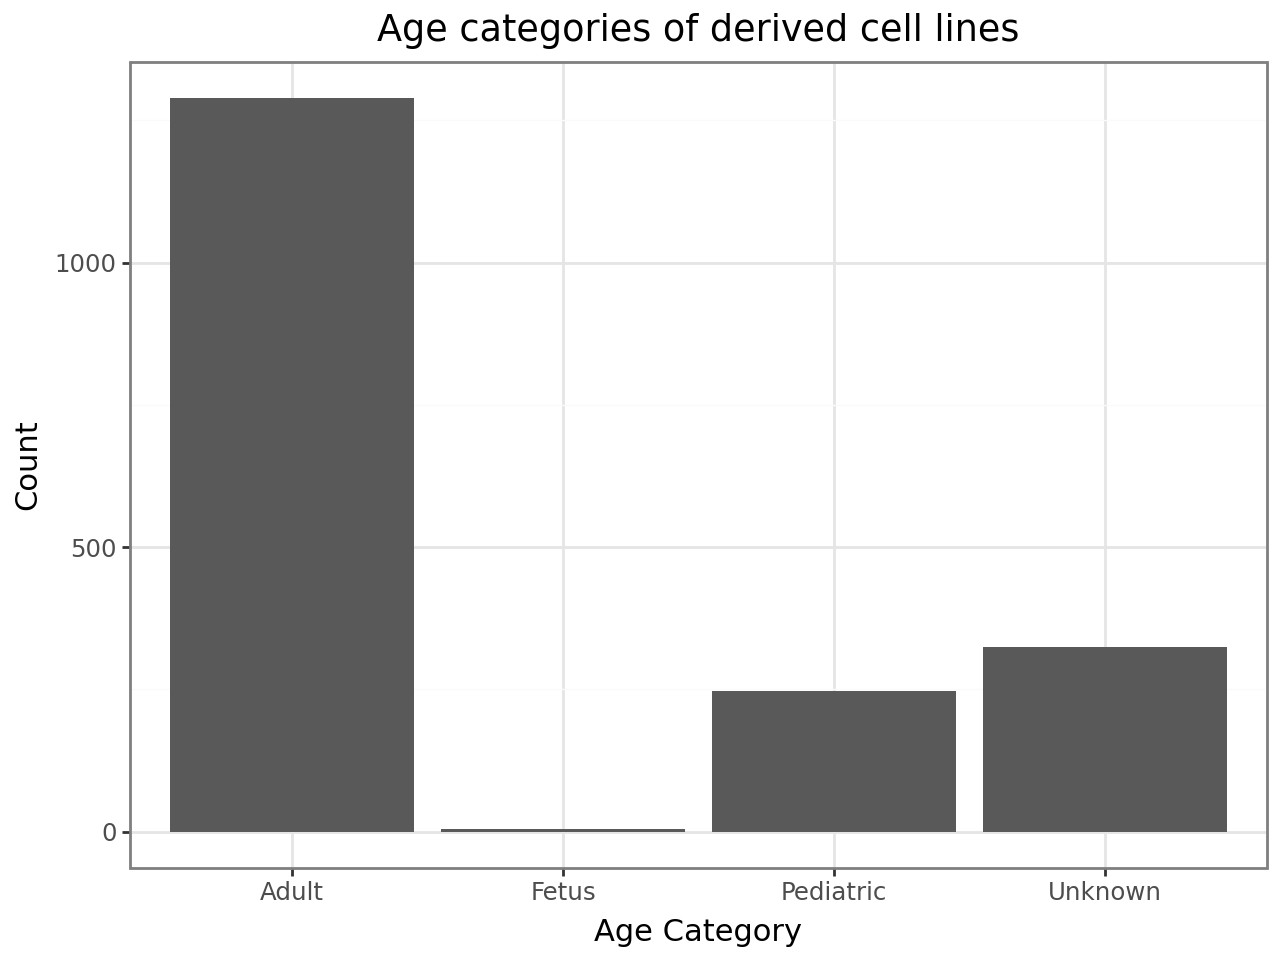

In [28]:
age_categories_bar = (
    gg.ggplot(model_df, gg.aes(x="AgeCategory"))
    + gg.geom_bar()
    + gg.ggtitle(
        f"Age categories of derived cell lines"
    )
    + gg.xlab("Age Category")
    + gg.ylab("Count")
    + gg.theme_bw()
)

age_categories_bar.save(age_category_output_figure, dpi=500)

age_categories_bar

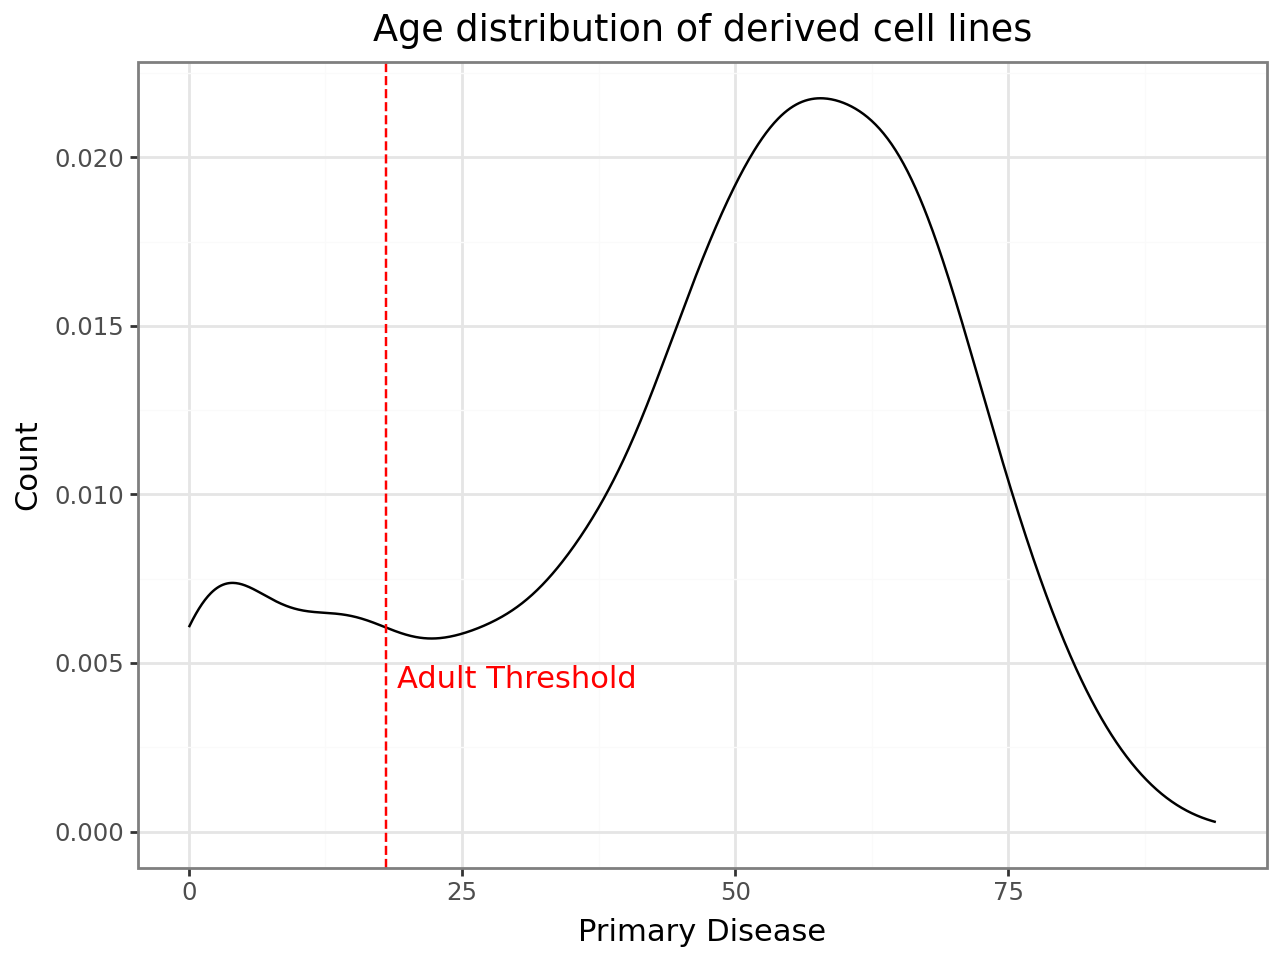

In [67]:
#What is this trying to say? Expand README for sure 
age_distribution_plot = (
    gg.ggplot(model_df, gg.aes(x="Age"))
    + gg.geom_density()
    + gg.geom_vline(xintercept=adult_threshold, linetype="dashed", color="red")
    + annotate(geom="text", x=30, y = 0.0045, label="Adult Threshold", color="red")
    + gg.ggtitle(
        f"Age distribution of derived cell lines"
    )
    + gg.xlab("Primary Disease")
    + gg.ylab("Count")
    + gg.theme_bw()
)

age_distribution_plot.save(age_distribution_output_figure, dpi=500)

age_distribution_plot

In [11]:
model_df['AgeCategory'].value_counts()

AgeCategory
Adult        1289
Unknown       324
Pediatric     247
Fetus           4
Name: count, dtype: int64

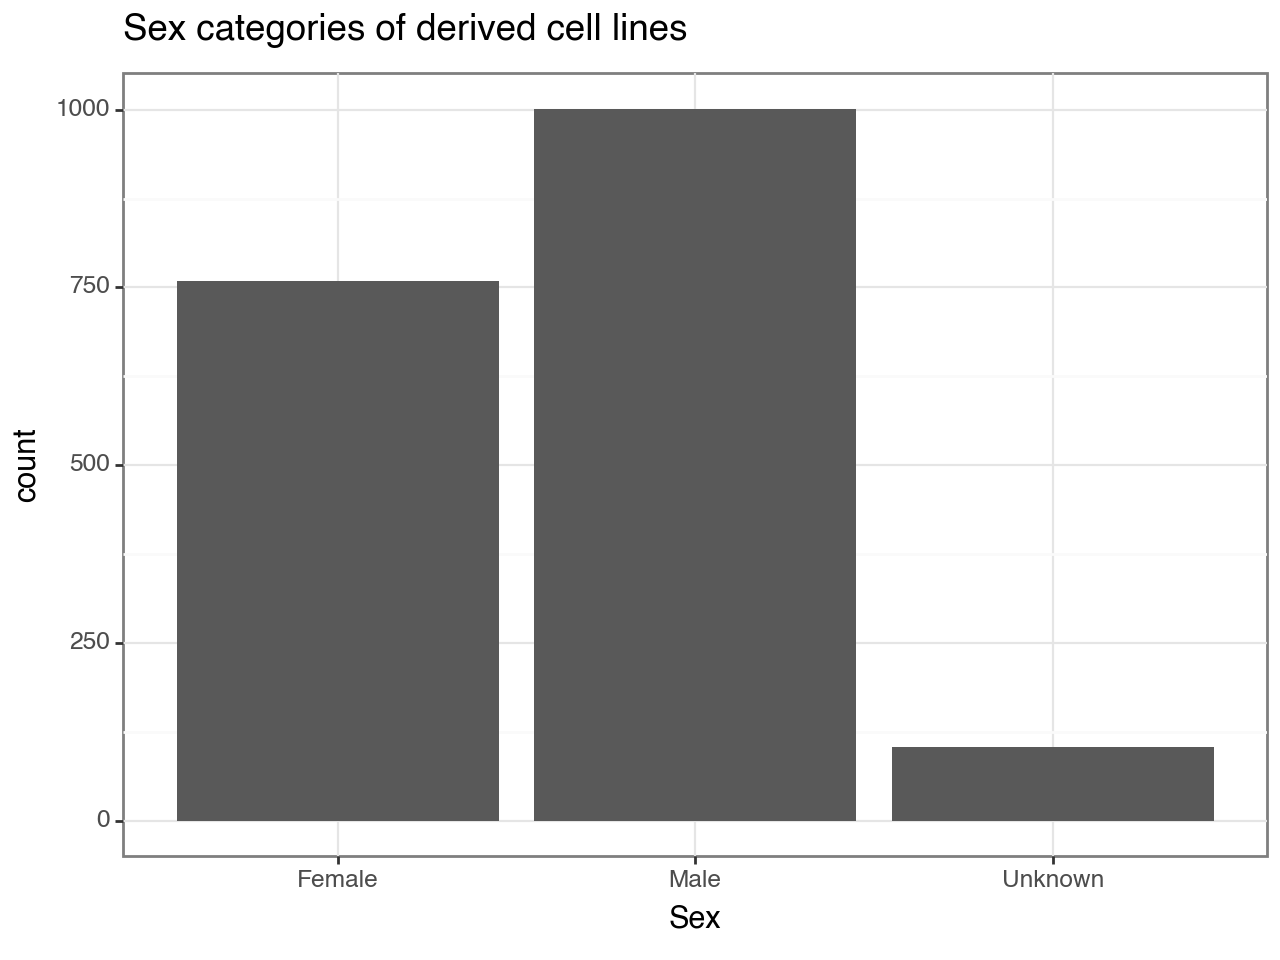

<Figure Size: (640 x 480)>

In [12]:
gendersamp_plot = (
    gg.ggplot(model_df, gg.aes(x="Sex"))
    + gg.geom_bar()
    + gg.ggtitle(f"Sex categories of derived cell lines")
    + gg.theme_bw()
)

gendersamp_plot.save(sex_output_figure)

gendersamp_plot

## What cell lines are pediatric cancer?

In [29]:
pediatric_model_df = (
    model_df.query("AgeCategory == 'Pediatric'")
    .query("ModelID in @sample_overlap")
    .reset_index(drop=True)
)

print(pediatric_model_df.shape)
pediatric_model_df.head(3)

(138, 30)


,ModelID,PatientID,CellLineName,StrippedCellLineName,Age,SourceType,SangerModelID,RRID,DepmapModelType,AgeCategory,...,PublicComments,WTSIMasterCellID,EngineeredModel,TreatmentStatus,OnboardedMedia,PlateCoating,OncotreeCode,OncotreeSubtype,OncotreePrimaryDisease,OncotreeLineage
0,ACH-000039,PT-wGDMGe,SK-N-MC,SKNMC,14.0,Commercial,SIDM00634,CVCL_0530,ES,Pediatric,...,NaN,NaN,NaN,NaN,MF-006-001,NaN,ES,Ewing Sarcoma,Ewing Sarcoma,Bone
1,ACH-000045,PT-zb7Sx0,MV4-11,MV411,10.0,Commercial,SIDM00657,CVCL_0064,AML,Pediatric,...,NaN,133.0,NaN,NaN,MF-005-001,NaN,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid
2,ACH-000052,PT-IAac7b,A-673,A673,15.0,Commercial,SIDM00848,CVCL_0080,ES,Pediatric,...,NaN,660.0,NaN,NaN,MF-002-001,NaN,ES,Ewing Sarcoma,Ewing Sarcoma,Bone


In [34]:
# What are the neuroblastoma models?
pediatric_model_df.query(
    "OncotreeSubtype == 'Neuroblastoma'"
).StrippedCellLineName

pediatric_model_df

,ModelID,PatientID,CellLineName,StrippedCellLineName,Age,SourceType,SangerModelID,RRID,DepmapModelType,AgeCategory,...,PublicComments,WTSIMasterCellID,EngineeredModel,TreatmentStatus,OnboardedMedia,PlateCoating,OncotreeCode,OncotreeSubtype,OncotreePrimaryDisease,OncotreeLineage
0,ACH-000039,PT-wGDMGe,SK-N-MC,SKNMC,14.0,Commercial,SIDM00634,CVCL_0530,ES,Pediatric,...,NaN,NaN,NaN,NaN,MF-006-001,NaN,ES,Ewing Sarcoma,Ewing Sarcoma,Bone
1,ACH-000045,PT-zb7Sx0,MV4-11,MV411,10.0,Commercial,SIDM00657,CVCL_0064,AML,Pediatric,...,NaN,133.0,NaN,NaN,MF-005-001,NaN,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid
2,ACH-000052,PT-IAac7b,A-673,A673,15.0,Commercial,SIDM00848,CVCL_0080,ES,Pediatric,...,NaN,660.0,NaN,NaN,MF-002-001,NaN,ES,Ewing Sarcoma,Ewing Sarcoma,Bone
3,ACH-000055,PT-xKYZGz,D283 Med,D283MED,6.0,Commercial,SIDM00888,CVCL_1155,MBL,Pediatric,...,NaN,1184.0,NaN,NaN,MF-006-001,NaN,MBL,Medulloblastoma,Embryonal Tumor,CNS/Brain
4,ACH-000070,PT-0yrZJC,697,697,12.0,Commercial,SIDM01076,CVCL_0079,BLL,Pediatric,...,NaN,63.0,NaN,NaN,MF-001-001,NaN,BLL,B-Lymphoblastic Leukemia/Lymphoma,B-Lymphoblastic Leukemia/Lymphoma,Lymphoid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,ACH-002282,PT-KDwcNS,NB17,NB17,1.0,Academic lab,SIDM00255,CVCL_1445,NBL,Pediatric,...,NaN,159.0,NaN,NaN,NaN,NaN,NBL,Neuroblastoma,Neuroblastoma,Peripheral Nervous System
134,ACH-002283,PT-x400Sq,NB5,NB5,2.0,Academic lab,SIDM00254,CVCL_8822,NBL,Pediatric,...,NaN,2071.0,NaN,NaN,MF-001-001,NaN,NBL,Neuroblastoma,Neuroblastoma,Peripheral Nervous System
135,ACH-002285,PT-ssOn9A,NB7,NB7,0.0,Academic lab,SIDM00156,CVCL_8824,NBL,Pediatric,...,NaN,1861.0,NaN,NaN,NaN,NaN,NBL,Neuroblastoma,Neuroblastoma,Peripheral Nervous System
136,ACH-002471,PT-UbzBsY,PSS008,PSS008,17.0,Academic lab,NaN,NaN,OS,Pediatric,...,NaN,NaN,NaN,NaN,MF-002-001,NaN,OS,Osteosarcoma,Osteosarcoma,Bone


In [37]:
# What is the distribution of pediatric tumor types

pediatric_cancer_counts = pediatric_model_df['OncotreePrimaryDisease'].value_counts()
pediatric_cancer_counts

OncotreePrimaryDisease
Neuroblastoma                                                                                          35
Embryonal Tumor                                                                                        19
Ewing Sarcoma                                                                                          14
Rhabdomyosarcoma                                                                                       12
Osteosarcoma                                                                                           11
B-Lymphoblastic Leukemia/Lymphoma                                                                      10
Non-Hodgkin Lymphoma                                                                                    9
Acute Myeloid Leukemia                                                                                  7
Synovial Sarcoma                                                                                        3
T-Lymphoblastic Leukemi

In [39]:
# What is the distribution of pediatric tumor types
pediatric_cancer_counts = (
    pediatric_model_df
    .OncotreePrimaryDisease
    .value_counts()
    .reset_index()
    .rename(columns={"count": "cancer_type_count"})
)
pediatric_cancer_counts

,OncotreePrimaryDisease,cancer_type_count
0,Neuroblastoma,35
1,Embryonal Tumor,19
2,Ewing Sarcoma,14
3,Rhabdomyosarcoma,12
4,Osteosarcoma,11
5,B-Lymphoblastic Leukemia/Lymphoma,10
6,Non-Hodgkin Lymphoma,9
7,Acute Myeloid Leukemia,7
8,Synovial Sarcoma,3
9,T-Lymphoblastic Leukemia/Lymphoma,3


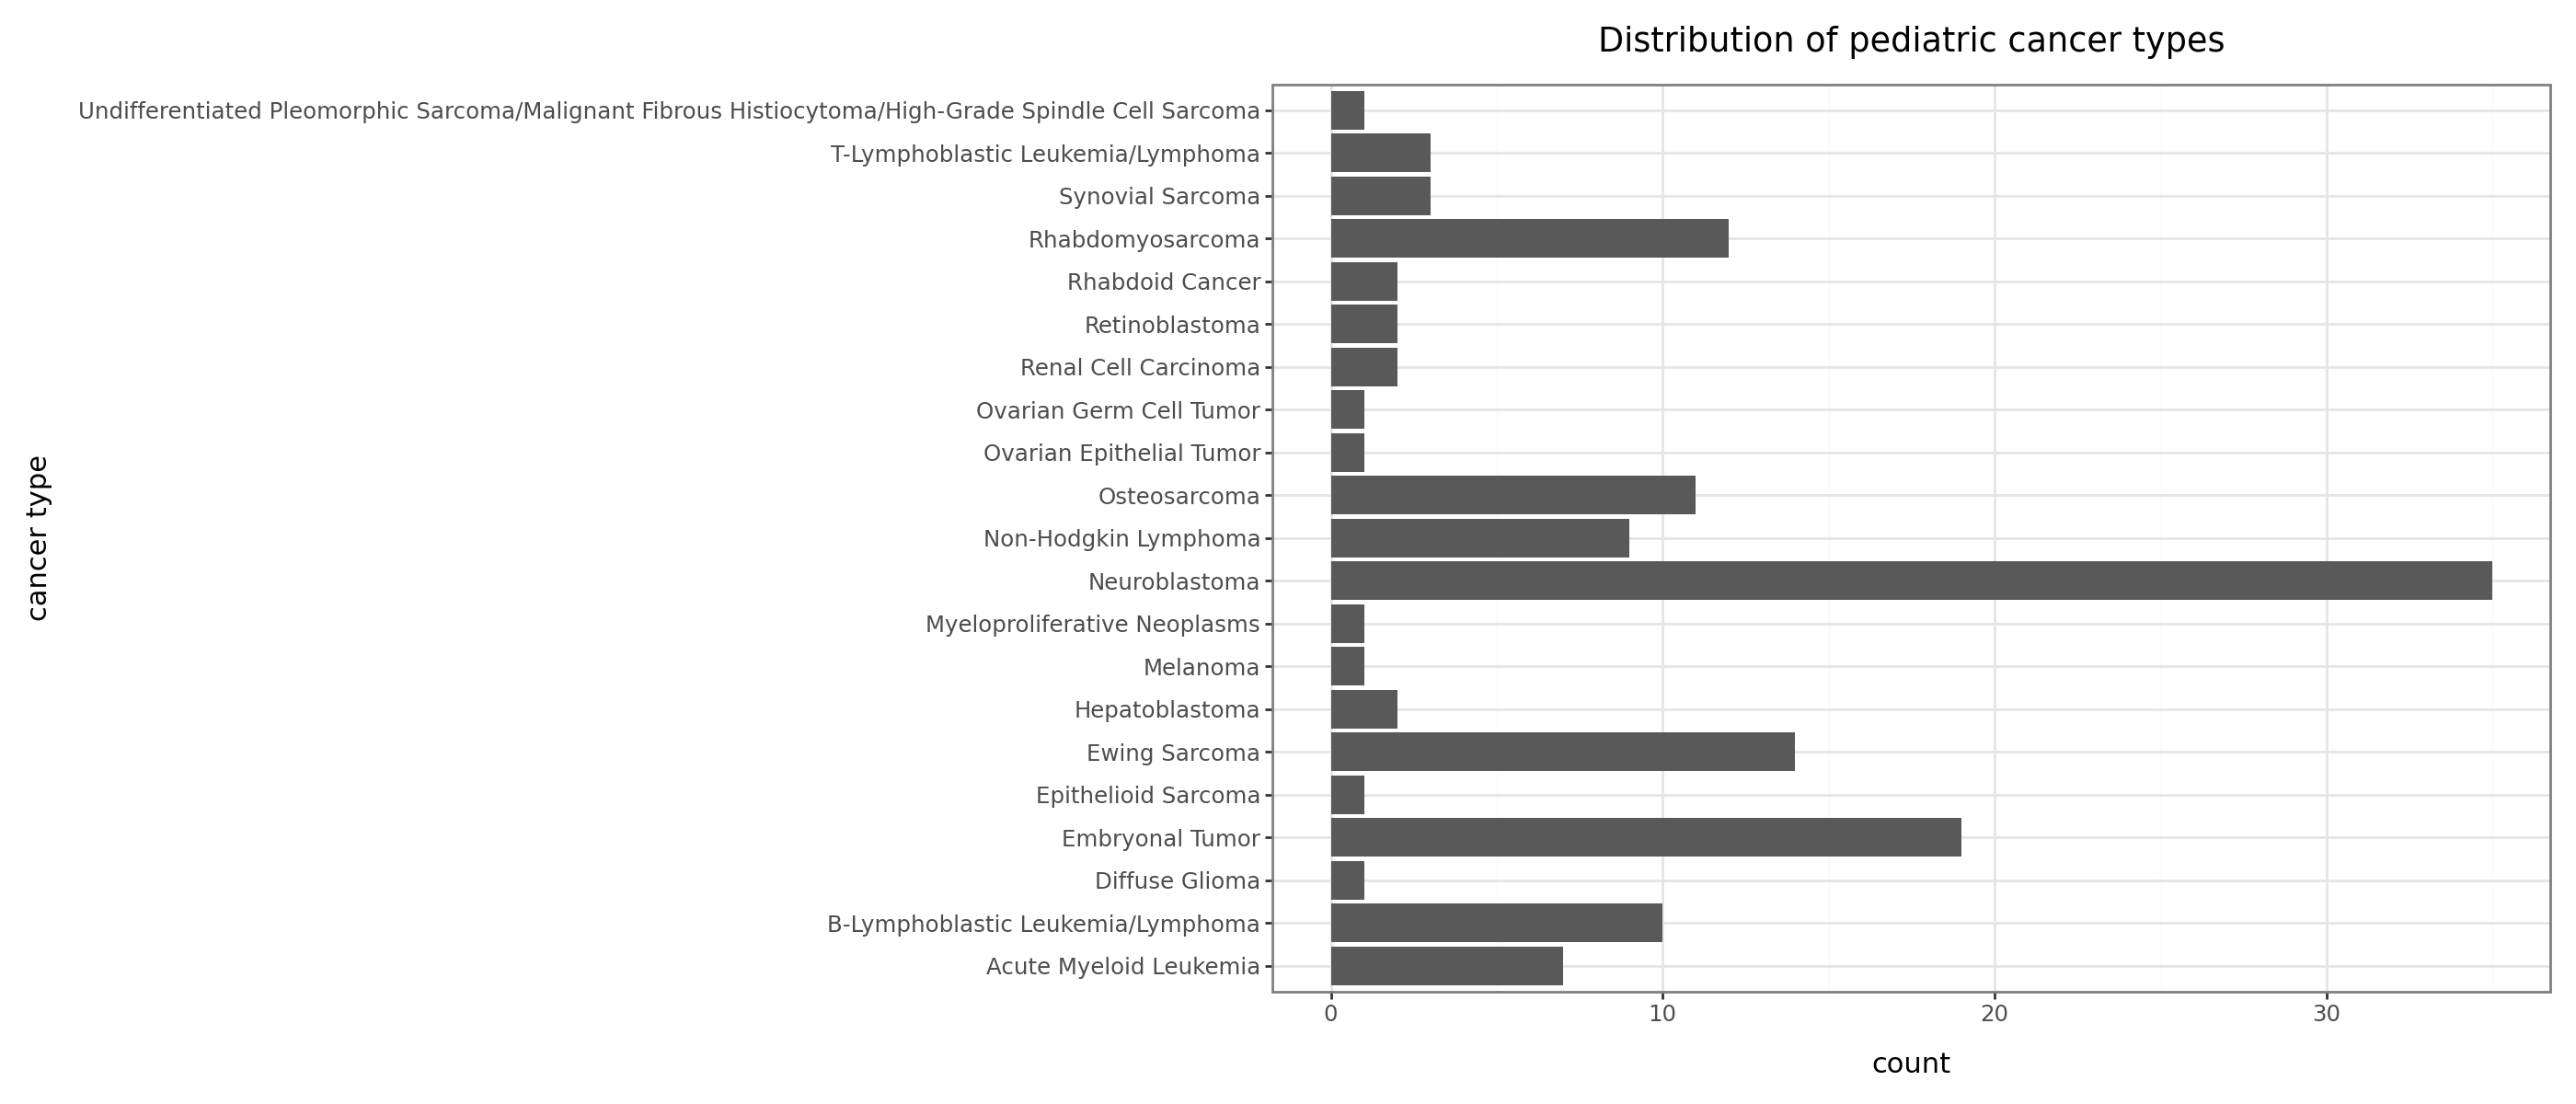

In [53]:
# Visualize pediatric cancer type distribution
ped_cancer_types_bar = (
    gg.ggplot(
        pediatric_cancer_counts.reset_index(), gg.aes(x="OncotreePrimaryDisease", y="cancer_type_count")
    )
    + gg.geom_bar(stat="identity")
    + gg.coord_flip()
    + gg.ggtitle("Distribution of pediatric cancer types")
    + gg.ylab("count")
    + gg.xlab("cancer type")
    + gg.theme_bw()
    + theme(figure_size = (14, 6))
)

ped_cancer_types_bar.save(pediatric_cancer_type_output_figure, dpi=500, height=6, width=12)

ped_cancer_types_bar

In [54]:
# Pediatric solid vs liquid tumors
cancer_types = pediatric_model_df['OncotreePrimaryDisease'].tolist()

ped_liquid = []
ped_non_liquid = []

for cancer_type in cancer_types:
    if liquid_tumors[0] in cancer_type or liquid_tumors[1] in cancer_type:
        ped_liquid.append(cancer_type)
    else:
        ped_non_liquid.append(cancer_type)

print("The number of pediatric solid tumors:")
print(len(ped_non_liquid))

print("The number of pediatric liquid tumors:")
print(len(ped_liquid))

The number of pediatric solid tumors:
109
The number of pediatric liquid tumors:
29


## What cell lines are adult cancer?

In [55]:
adult_model_df = (
    model_df.query("AgeCategory == 'Adult'")
    .query("ModelID in @sample_overlap")
    .reset_index(drop=True)
)

print(adult_model_df.shape)
adult_model_df.head(3)

(774, 30)


,ModelID,PatientID,CellLineName,StrippedCellLineName,Age,SourceType,SangerModelID,RRID,DepmapModelType,AgeCategory,...,PublicComments,WTSIMasterCellID,EngineeredModel,TreatmentStatus,OnboardedMedia,PlateCoating,OncotreeCode,OncotreeSubtype,OncotreePrimaryDisease,OncotreeLineage
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,60.0,Commercial,SIDM00105,CVCL_0465,HGSOC,Adult,...,NaN,2201.0,NaN,NaN,MF-001-041,NaN,HGSOC,High-Grade Serous Ovarian Cancer,Ovarian Epithelial Tumor,Ovary/Fallopian Tube
1,ACH-000004,PT-q4K2cp,HEL,HEL,30.0,Commercial,SIDM00594,CVCL_0001,AML,Adult,...,NaN,783.0,NaN,Post-treatment,MF-001-001,NaN,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid
2,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,30.0,Commercial,SIDM00593,CVCL_2481,AML,Adult,...,NaN,NaN,NaN,NaN,MF-001-001,NaN,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid


In [56]:
# What is the distribution of adult tumor types
adult_cancer_counts = adult_model_df.OncotreePrimaryDisease.value_counts()
adult_cancer_counts

OncotreePrimaryDisease
Non-Small Cell Lung Cancer               79
Diffuse Glioma                           60
Head and Neck Squamous Cell Carcinoma    58
Colorectal Adenocarcinoma                49
Melanoma                                 48
                                         ..
Sarcoma, NOS                              1
Myelodysplastic Syndromes                 1
Poorly Differentiated Thyroid Cancer      1
Fibrosarcoma                              1
Head and Neck Carcinoma, Other            1
Name: count, Length: 61, dtype: int64

In [57]:
# What is the distribution of adult tumor types
adult_cancer_counts = (
    adult_model_df
    .OncotreePrimaryDisease
    .value_counts()
    .reset_index()
    .rename(columns={"count": "cancer_type_count"})
)

adult_cancer_counts

,OncotreePrimaryDisease,cancer_type_count
0,Non-Small Cell Lung Cancer,79
1,Diffuse Glioma,60
2,Head and Neck Squamous Cell Carcinoma,58
3,Colorectal Adenocarcinoma,49
4,Melanoma,48
...,...,...
56,"Sarcoma, NOS",1
57,Myelodysplastic Syndromes,1
58,Poorly Differentiated Thyroid Cancer,1
59,Fibrosarcoma,1


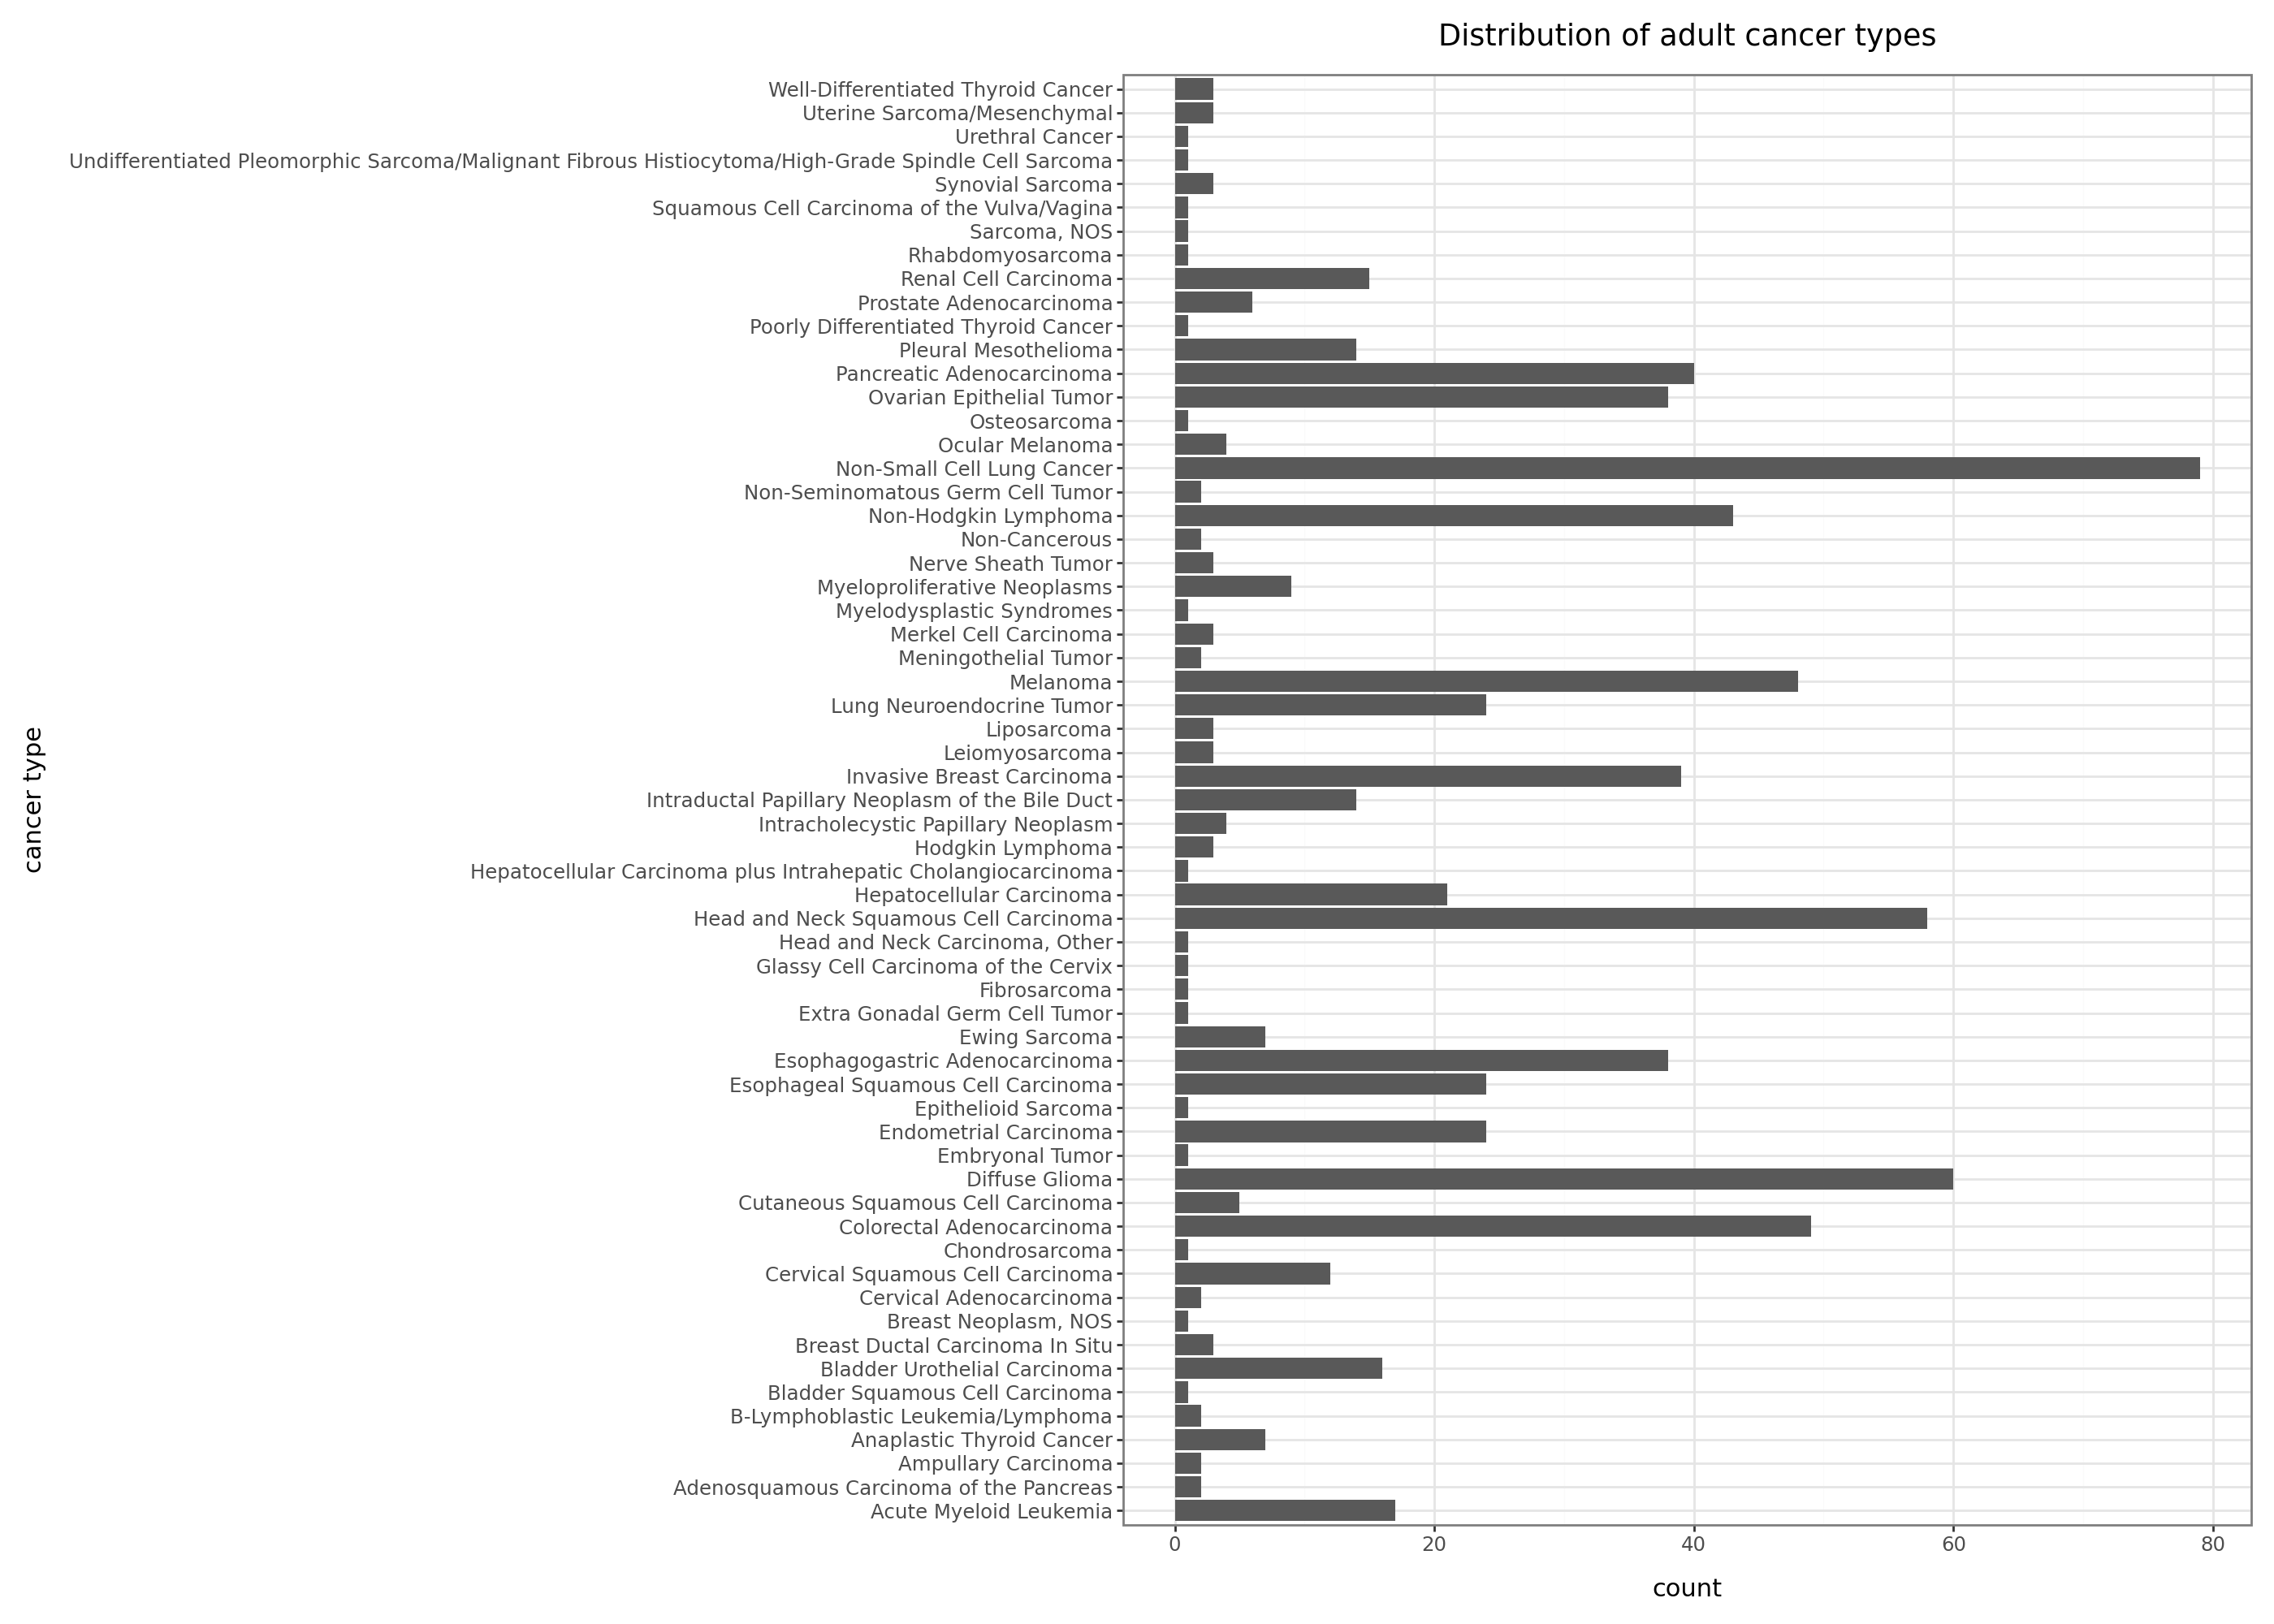

In [60]:
# Visualize adult cancer type distribution
adult_cancer_types_bar = (
    gg.ggplot(
        adult_cancer_counts.reset_index(), gg.aes(x="OncotreePrimaryDisease", y="cancer_type_count")
    )
    + gg.geom_bar(stat="identity")
    + gg.coord_flip()
    + gg.ggtitle("Distribution of adult cancer types")
    + gg.ylab("Count")
    + gg.xlab("Cancer Type")
    + gg.theme_bw()
    + theme(figure_size = (14, 10))
)

adult_cancer_types_bar.save(adult_cancer_type_output_figure, dpi=500, height=10, width=12)

adult_cancer_types_bar

In [61]:
# Adult solid vs liquid tumors
cancer_types = adult_model_df['OncotreePrimaryDisease'].tolist()

adult_liquid = []
adult_non_liquid = []

for cancer_type in cancer_types:
    if liquid_tumors[0] in cancer_type or liquid_tumors[1] in cancer_type:
        adult_liquid.append(cancer_type)
    else:
        adult_non_liquid.append(cancer_type)

print("The number of adult solid tumors:")
print(len(adult_non_liquid))

print("The number of adult liquid tumors:")
print(len(adult_liquid))

The number of adult solid tumors:
709
The number of adult liquid tumors:
65
